In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from IPython.display import Image, display, Markdown
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')

display(HTML("<style = font-size>pre {white-space: pre !important;}</style>"))

In [2]:
data_dir = './data/'

In [3]:
df_insurance = pd.read_csv(f'{data_dir}insurance.csv')
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Data Cleaning
df_insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Feature Engeneering
df_insurance['born_year'] = (pd.Timestamp.now() - (df_insurance['age'] * np.timedelta64(365, 'D'))).dt.year
df_insurance['has_children'] = df_insurance['children'] > 0
df_insurance = pd.get_dummies(df_insurance, drop_first=True)

df_insurance

,age,bmi,children,charges,born_year,has_children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,2005,False,False,True,False,False,True
1,18,33.770,1,1725.55230,2006,True,True,False,False,True,False
2,28,33.000,3,4449.46200,1996,True,True,False,False,True,False
3,33,22.705,0,21984.47061,1991,False,True,False,True,False,False
4,32,28.880,0,3866.85520,1992,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1974,True,True,False,True,False,False
1334,18,31.920,0,2205.98080,2006,False,False,False,False,False,False
1335,18,36.850,0,1629.83350,2006,False,False,False,False,True,False
1336,21,25.800,0,2007.94500,2003,False,False,False,False,False,True


In [6]:
#Data Analysis
df_insurance.describe()

,age,bmi,children,charges,born_year
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,1984.792975
std,14.049960,6.098187,1.205493,12110.011237,14.049960
min,18.000000,15.960000,0.000000,1121.873900,1960.000000
25%,27.000000,26.296250,0.000000,4740.287150,1973.000000
50%,39.000000,30.400000,1.000000,9382.033000,1985.000000
75%,51.000000,34.693750,2.000000,16639.912515,1997.000000
max,64.000000,53.130000,5.000000,63770.428010,2006.000000


In [7]:
#Data Transformation
scaler = StandardScaler()
df_insurance['age'] = pd.DataFrame(scaler.fit_transform(df_insurance[['age']]))
df_insurance['bmi'] = pd.DataFrame(scaler.fit_transform(df_insurance[['bmi']]))
df_insurance['children'] = pd.DataFrame(scaler.fit_transform(df_insurance[['children']]))
df_insurance['charges'] = pd.DataFrame(scaler.fit_transform(df_insurance[['charges']]))
df_insurance['born_year'] = pd.DataFrame(scaler.fit_transform(df_insurance[['born_year']]))

df_insurance

,age,bmi,children,charges,born_year,has_children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,1.438764,False,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,-0.953689,1.509965,True,True,False,False,True,False
2,-0.797954,0.383307,1.580926,-0.728675,0.797954,True,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,0.719843,0.441948,False,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,-0.776802,0.513149,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,-0.768473,True,True,False,True,False,False
1334,-1.509965,0.206139,-0.908614,-0.914002,1.509965,False,False,False,False,False,False
1335,-1.509965,1.014878,-0.908614,-0.961596,1.509965,False,False,False,False,True,False
1336,-1.296362,-0.797813,-0.908614,-0.930362,1.296362,False,False,False,False,False,True


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'born_year'}>, <Axes: >]], dtype=object)

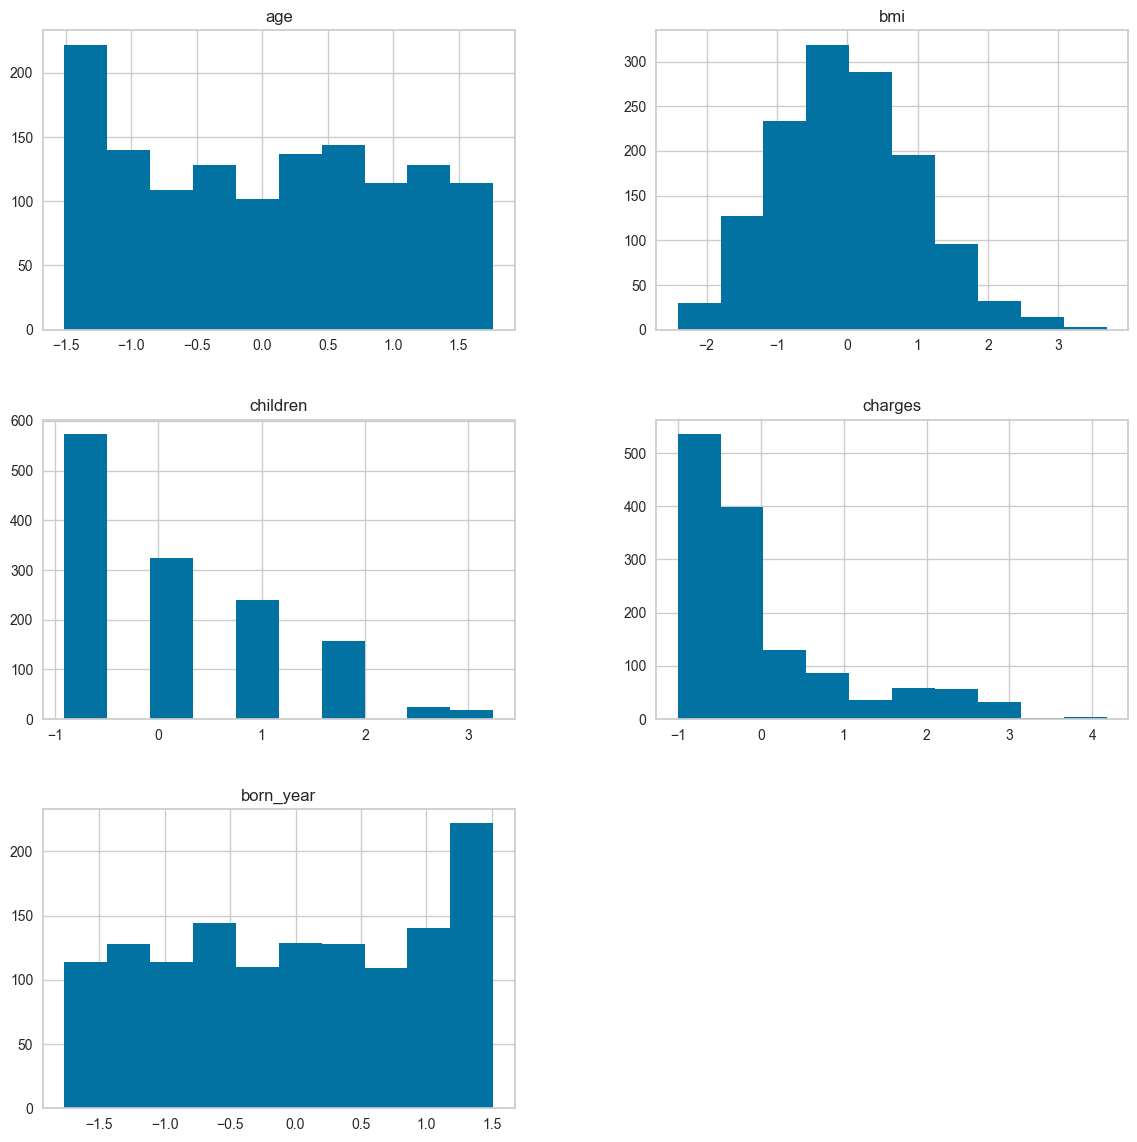

In [8]:
df_insurance.hist(figsize=(14, 14))

<Axes: >

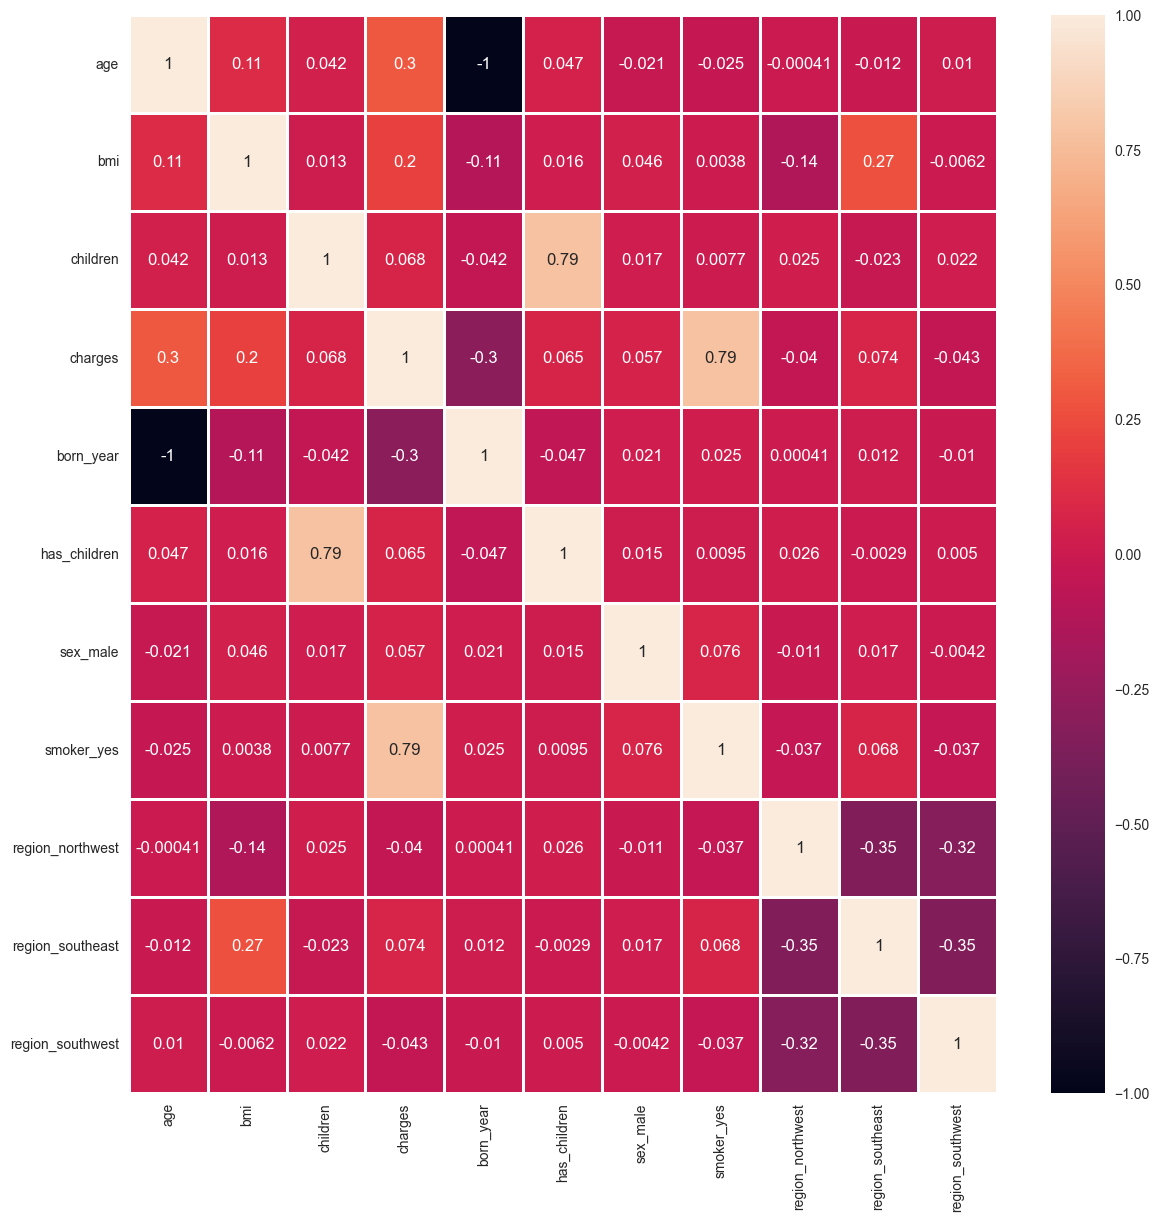

In [9]:
# Data Analysis
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_insurance.corr(), annot=True, linewidths=.8)

In [ ]:
experiment = RegressionExperiment()
experiment.setup(data=df_insurance, 
                 target='charges',
                 use_gpu=True)

In [11]:
best_model = experiment.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2164,0.1455,0.3726,0.8349,0.1663,1.0071,0.1030
lightgbm,Light Gradient Boosting Machine,0.2497,0.1694,0.4056,0.8086,0.1862,1.1839,0.1960
rf,Random Forest Regressor,0.2376,0.1706,0.4059,0.8063,0.1809,1.1490,0.3340
ada,AdaBoost Regressor,0.3344,0.1827,0.4243,0.7961,0.2151,1.5527,0.0160
et,Extra Trees Regressor,0.2348,0.1984,0.4392,0.7785,0.1810,1.1489,0.2350
ridge,Ridge Regression,0.3550,0.2580,0.5059,0.7129,0.2247,1.2216,0.0210
br,Bayesian Ridge,0.3547,0.2581,0.5059,0.7128,0.2246,1.2223,0.0080
lr,Linear Regression,0.3554,0.2591,0.5069,0.7117,0.2253,1.2326,0.0160
dt,Decision Tree Regressor,0.2650,0.2944,0.5392,0.6711,0.1940,1.0225,0.0090
huber,Huber Regressor,0.2923,0.3354,0.5738,0.6217,0.2377,0.9230,0.0110
